In [1]:
import matplotlib.pyplot as plt
#pylap inline
import sympy as sym
import numpy as np

import FDMethods as fdmet

Point 1

In the below chuncks, Forward Difference, Backward Difference and Central Difference in matrix form will be implemented

$\delta_{h,+} f (x)= \frac{f(x+h)-f(x)}{h}$  

$\delta_{h,-} f (x)= \frac{f(x)-f(x-h)}{h}$    

$\delta_{h} f (x)= \frac{f(x+h/2)-f(x-h/2)}{h}$    

The following is the problem statement: 
* Test the error convergence for the 3 methods for derivative of $y = \sin(x)$
* Test how teh error changes if increase the number of nodes in the grid

In [2]:
# Formal definition of the function to approxiamte the first derivative
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

# Define the omega, so the domain
a = 0
b = 1

# Define the experiment
no_expe = 8 
error_FD = np.zeros(no_expe)
error_BD = np.zeros(no_expe)
error_CD = np.zeros(no_expe)
nn = np.zeros(no_expe)

# Init the model

for i in range(no_expe):
    # Common setup
    n = 2**(i+1)
    nn[i] = n
    x = np.linspace(a,b,n+1)
    # init
    method = fdmet.first_order_first_derivative_FiniteDiff(n, (b-a)/n)
    # FD
    FD_matrix = method.FD()
    u_x_FD = FD_matrix.dot(fsym(x))[0:n]
    error_FD[i] = max(abs(u_x_FD-fsym_x(x)[0:n]))
    # BD
    BD_matrix = method.BD()
    u_x_BD = BD_matrix.dot(fsym(x))[1:n+1]
    error_BD[i] = max(abs(u_x_BD-fsym_x(x)[1:n+1]))
    # CD
    CD_matrix = method.CD()
    u_x_CD = CD_matrix.dot(fsym(x))[1:n]
    error_CD[i] = max(abs(u_x_CD-fsym_x(x)[1:n]))

Plot to confirm theoretical order of convergence

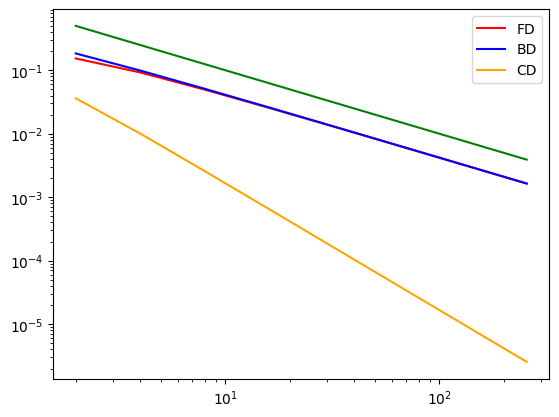

In [3]:
plt.loglog(nn,error_FD,'red', label = "FD")
plt.loglog(nn,error_BD,'blue', label = "BD")
plt.loglog(nn,error_CD,'orange', label = "CD")
plt.loglog(nn,nn**(-1),'green')
plt.legend()
plt.show()

Comment:
* FD and BD are 1st order of convergence
* CD is 2nd order of convergence
* The plot shows clearly that CD decrease faster as expected
* FD and BD have basically same convergence speed

Point 2

Implement second order "one-side" formula for first order derivative approximation

* $\delta_{h,+} f (x)= \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} $    

* $\delta_{h,-} f (x)= \frac{f(x-2h)-4f(x-h)+3f(x)}{2h} $    

In [4]:
# Formal definition of the function to approxiamte the first derivative
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

# Define the omega, so the domain
a = 0
b = 1

# Define the experiment
no_expe = 8 
error_FD_2ord = np.zeros(no_expe)
error_BD_2ord = np.zeros(no_expe)
error_CD = np.zeros(no_expe)
nn = np.zeros(no_expe)

# Init the model

for i in range(no_expe):
    # Common setup
    n = 2**(i+1)
    nn[i] = n
    x = np.linspace(a,b,n+1)
    # init
    method = fdmet.first_order_first_derivative_FiniteDiff(n, (b-a)/n)
    method_2ord = fdmet.second_order_first_derivative_FiniteDiff(n, (b-a)/n)
    # FD
    FD_matrix = method_2ord.FD()
    u_x_FD = FD_matrix.dot(fsym(x))[0:n-1]
    error_FD_2ord[i] = max(abs(u_x_FD-fsym_x(x)[0:n-1]))
    # BD
    BD_matrix = method_2ord.BD()
    u_x_BD = BD_matrix.dot(fsym(x))[2:n+1]
    error_BD_2ord[i] = max(abs(u_x_BD-fsym_x(x)[2:n+1]))
    # CD
    CD_matrix = method.CD()
    u_x_CD = CD_matrix.dot(fsym(x))[1:n]
    error_CD[i] = max(abs(u_x_CD-fsym_x(x)[1:n]))

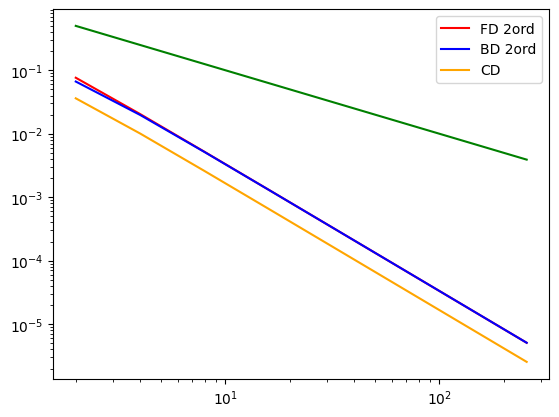

In [5]:
plt.loglog(nn,error_FD_2ord,'red', label = "FD 2ord")
plt.loglog(nn,error_BD_2ord,'blue', label = "BD 2ord")
plt.loglog(nn,error_CD,'orange', label = "CD")
plt.loglog(nn,nn**(-1),'green')
plt.legend()
plt.show()

Comments:
* Both FD and BD 2order, have same slope that is also the same of CD because parallel. It is shown that theoretical convergence order is respected.

Point 3

Now, the second order formulas to approximate second order derivatives

$\delta_{h,+}^2 f (x)= \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$ 

$\delta_{h,-}^2 f (x)= \frac{f(x)-2f(x-h)+f(x-2h)}{h^2}$

$\delta_{h}^2 f (x)= \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$   

In [6]:
# Formal definition of the function to approxiamte the first derivative
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_xx = sym.lambdify(t, my_f.diff(t,2))

# Define the omega, so the domain
a = 0
b = 1

# Define the experiment
no_expe = 8 
error_FD_2der = np.zeros(no_expe)
error_BD_2der = np.zeros(no_expe)
error_CD_2der = np.zeros(no_expe)
nn = np.zeros(no_expe)

# Init the model

for i in range(no_expe):
    # Common setup
    n = 2**(i+1)
    nn[i] = n
    x = np.linspace(a,b,n+1)
    # init
    method = fdmet.second_derivative_FiniteDiff(n, (b-a)/n)
    # FD
    FD_matrix = method.FD()
    u_x_FD = FD_matrix.dot(fsym(x))[0:n-1]
    error_FD_2der[i] = max(abs(u_x_FD-fsym_xx(x)[0:n-1]))
    # BD
    BD_matrix = method.BD()
    u_x_BD = BD_matrix.dot(fsym(x))[2:n+1]
    error_BD_2der[i] = max(abs(u_x_BD-fsym_xx(x)[2:n+1]))
    # CD
    CD_matrix = method.CD()
    u_x_CD = CD_matrix.dot(fsym(x))[1:n]
    error_CD_2der[i] = max(abs(u_x_CD-fsym_xx(x)[1:n]))

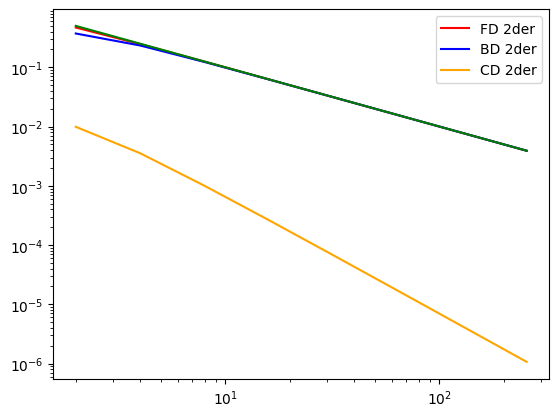

In [7]:
plt.loglog(nn,error_FD_2der,'red', label = "FD 2der")
plt.loglog(nn,error_BD_2der,'blue', label = "BD 2der")
plt.loglog(nn,error_CD_2der,'orange', label = "CD 2der")
plt.loglog(nn,nn**(-1),'green')
plt.legend()
plt.show()

Comments:
* Here, as forsee by theory, the CD for second derivative has higher order of convergence respect to BD and FD.